# Generating SQL for SQLite using Azure OpenAI, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-anthropic-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-gemini-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-azure-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-openai-azure-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
df = pd.read_csv('data.csv', low_memory=False)
from sqlalchemy.types import Integer, Float, String, Boolean, DateTime
# Convert DataFrame columns to specified types
dtype_mapping = {
    'TLInstance': String,  # Use String for text-based unique identifier
    'data': Float,        # Assuming 'data' is text
    'sort': String,       # Assuming 'sort' is an integer
    'time': String,        # Time as text
    'overnight': Boolean,  # Boolean for true/false values
    'Room': String,        # Assuming 'Room' is text
    'fumehood': String,   # Boolean for true/false values
    'percent': Boolean,      # Floating point for percentages
    'DEPT': String,        # Assuming 'DEPT' is text
    'valid': Boolean,      # Boolean for true/false values
    'date': String,        # Date as text
    'Top10OSH': Integer,   # Assuming 'Top10OSH' is an integer
    'OSH': Float,        # Assuming 'OSH' is an integer
    'CDOValue': Float,     # Floating point for CDOValue
    'CDOET': Integer,      # Assuming 'CDOET' is an integer
    'nonusecount': Integer, # Integer for counts
    'cat': String          # Assuming 'cat' is text
}



# Use this dtype_mapping with the to_sql method


conn = create_engine('sqlite:///my_lite_store.sqlite')
df = df.fillna(0)
df.to_sql('energy', conn, if_exists='replace', dtype=dtype_mapping, index=False)
df_sqlite = pd.read_sql_query('SELECT * FROM energy', conn)
assert df.equals(df_sqlite), "DataFrame and SQLite data are not equal!"

AssertionError: DataFrame and SQLite data are not equal!

In [ ]:
df_sqlite

,_id,TLInstance,data,sort,time,Room,fumehood,percent,DEPT,overnight,date,valid,Top10OSH,OSH,CDOValue,CDOET,nonusecount,cat
0,668e3263c50f35e4546d0a8a,703,72.3591,1720540769000,2024-07-09 23:59:29,6114,FH25,0,CBE,0,2024-07-09,0,0,0.0,0.0,0,0,0
1,668e3263c50f35e4546d05c5,678,50.0000,1720540720000,2024-07-09 23:58:40,6124,FH041,0,CHEM,0,2024-07-09,0,0,0.0,0.0,0,0,0
2,668d89a298ee79ee357a13cb,1365,56.6825,1720540552000,2024-07-09 23:55:52,UG001,FH418,1,CHEM,0,2024-07-09,0,0,0.0,0.0,0,0,0
3,668d89a298ee79ee357a13fb,1367,50.0000,1720540552000,2024-07-09 23:55:52,UG001,FH437,1,CHEM,0,2024-07-09,0,0,0.0,0.0,0,0,0
4,668d89a298ee79ee357a142b,1369,52.7675,1720540552000,2024-07-09 23:55:52,UG002,FH401,1,CHEM,0,2024-07-09,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101171,6683b7aebfaebc87f7b068b3,1257,76.7488,1719763200000,2024-07-01 00:00:00,G031D,FH315,0,MAE,1,2024-07-01,0,0,0.0,0.0,0,1,Good
101172,6683b7aebfaebc87f7b06aa7,1263,53.5091,1719763200000,2024-07-01 00:00:00,2123,FC41,0,CHEM,1,2024-07-01,0,0,0.0,0.0,0,0,0
101173,6683b7aebfaebc87f7b06c2c,1269,129.8390,1719763200000,2024-07-01 00:00:00,3107D,FC03,0,HSEO,1,2024-07-01,0,0,0.0,0.0,0,0,0
101174,6683b7aebfaebc87f7b06e20,1272,192.5080,1719763200000,2024-07-01 00:00:00,3112,FC04,0,ECE,1,2024-07-01,0,0,0.0,0.0,0,1,Good


In [ ]:
df

,TLInstance,data,sort,time,overnight,Room,fumehood,percent,DEPT,valid,date,Top10OSH,OSH,CDOValue,CDOET,nonusecount,cat
0,253,50.0000,1711481400000,2024-03-27 03:30:00,True,2164,FH475,False,ECE,True,2024-03-27,0,50.00,0.0,0,0,nan
1,253,50.0000,1711480500000,2024-03-27 03:15:00,True,2164,FH475,False,ECE,True,2024-03-27,0,50.00,0.0,0,0,nan
2,253,50.0000,1711479600000,2024-03-27 03:00:00,True,2164,FH475,False,ECE,True,2024-03-27,0,50.00,0.0,0,0,nan
3,253,50.0000,1711478700000,2024-03-27 02:45:00,True,2164,FH475,False,ECE,True,2024-03-27,0,50.00,0.0,0,0,nan
4,253,50.0000,1711477800000,2024-03-27 02:30:00,True,2164,FH475,False,ECE,True,2024-03-27,0,50.00,0.0,0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182298,1782,154.3100,1710810690000,2024-03-19 09:11:30,False,6014,FH531,True,CHEM,True,2024-03-19,0,154.31,0.0,0,0,nan
182299,1782,154.3100,1710809821000,2024-03-19 08:57:01,False,6014,FH531,True,CHEM,True,2024-03-19,0,154.31,0.0,0,0,nan
182300,1782,154.3100,1710808951000,2024-03-19 08:42:31,False,6014,FH531,True,CHEM,True,2024-03-19,0,154.31,0.0,0,0,nan
182301,1782,153.9275,1710808049000,2024-03-19 08:27:29,False,6014,FH531,True,CHEM,True,2024-03-19,0,154.31,0.0,0,0,nan


In [ ]:
# Compare the DataFrames and identify the differences
comparison_result = df.compare(df_sqlite)

# Print out the rows that are different
if not comparison_result.empty:
    print("Rows with differences:")
    print(comparison_result)
else:
    print("DataFrame and SQLite data are equal.")

DataFrame and SQLite data are equal.


In [ ]:
import pandas as pd
import datetime

def slice_offwork(df):
        night_hours_start = 0
        night_hours_end = 8
        weekday_data = df[(df['time'].dt.weekday >= 0) & (df['time'].dt.weekday <= 7) & (df['time'].dt.hour >= night_hours_start) & (df['time'].dt.hour < night_hours_end)]
        #weekend_data = df[(df['time'].dt.weekday >= 10)]
        #pd.concat([weekday_data,weekend_data])
        return weekday_data

def Top10OSH(df):
    # Slice off the off-work hours

    m = slice_offwork(df)

    # Calculate the mean for each TLInstance
    mean_data = m.groupby('TLInstance')['data'].mean().reset_index()

    # Sort values and select the top 10
    top10_osh = mean_data.sort_values('data', ascending=False).head(10)

    # Add a new column 'Top10OSH' and mark corresponding rows as 1
    df.loc[:, 'Top10OSH'] = 0
    df.loc[df['TLInstance'].isin(top10_osh['TLInstance']), 'Top10OSH'] = 1

    # Add a new column 'OSH' with the mean value for each TLInstance
    df.loc[:, 'OSH'] = df['TLInstance'].map(mean_data.set_index('TLInstance')['data'])


    return df

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df_sqlite['time'] = pd.to_datetime(df_sqlite['time'])
Top10OSH(df_sqlite)

,TLInstance,data,sort,time,overnight,Room,fumehood,percent,DEPT,valid,date,Top10OSH,OSH,CDOValue,CDOET,nonusecount,cat
0,253,50.0000,1711481400000,2024-03-27 03:30:00,1,2164,FH475,0,ECE,1,2024-03-27,0,50.00,0.0,0,0,nan
1,253,50.0000,1711480500000,2024-03-27 03:15:00,1,2164,FH475,0,ECE,1,2024-03-27,0,50.00,0.0,0,0,nan
2,253,50.0000,1711479600000,2024-03-27 03:00:00,1,2164,FH475,0,ECE,1,2024-03-27,0,50.00,0.0,0,0,nan
3,253,50.0000,1711478700000,2024-03-27 02:45:00,1,2164,FH475,0,ECE,1,2024-03-27,0,50.00,0.0,0,0,nan
4,253,50.0000,1711477800000,2024-03-27 02:30:00,1,2164,FH475,0,ECE,1,2024-03-27,0,50.00,0.0,0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182298,1782,154.3100,1710810690000,2024-03-19 09:11:30,0,6014,FH531,1,CHEM,1,2024-03-19,0,154.31,0.0,0,0,nan
182299,1782,154.3100,1710809821000,2024-03-19 08:57:01,0,6014,FH531,1,CHEM,1,2024-03-19,0,154.31,0.0,0,0,nan
182300,1782,154.3100,1710808951000,2024-03-19 08:42:31,0,6014,FH531,1,CHEM,1,2024-03-19,0,154.31,0.0,0,0,nan
182301,1782,153.9275,1710808049000,2024-03-19 08:27:29,0,6014,FH531,1,CHEM,1,2024-03-19,0,154.31,0.0,0,0,nan


In [ ]:
df[df['Top10OSH'] == 1]['fumehood'].unique()

In [ ]:
df[df['fumehood'] == 'FH21']['OSH']

In [ ]:
df_sqlite[df_sqlite['Top10OSH'] == 1]['fumehood'].unique()

  fumehood  mean_sash_height
0    FH518        745.916508
1     FH20        611.369379
2    FH499        524.435000
3    FH498        503.262500
4    FH411        502.925000
5    FH485        499.865000
6    FH502        497.615000
7    FH410        495.072500
8    FH496        494.915000
9    FH462        492.147500

In [ ]:
df_sqlite[df_sqlite['fumehood'] == 'FH20']['OSH']

In [ ]:
%pip install 'vanna[chromadb,openai]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.3 MB/s eta 0:00:00
  Installing build dependencie

In [ ]:
from vanna.openai import OpenAI_Chat
from openai import AzureOpenAI
from vanna.chromadb import ChromaDB_VectorStore


In [ ]:
import os
os.environ["AZURE_OPENAI_API_KEY"] = ""
os.environ["AZURE_OPENAI_ENDPOINT"] = ""
os.environ["AZURE_OPENAI_API_VERSION"] = ""
os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"] = ""

llm = AzureOpenAI(
    azure_endpoint = "https://hkust.azure-api.net",
    api_version = os.environ["AZURE_OPENAI_API_VERSION"],
    api_key = os.environ["AZURE_OPENAI_API_KEY"],
)


class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, client=llm, config=config) # Make sure to put your AzureOpenAI client here

vn = MyVanna(config={'model': 'gpt-35-turbo'})



<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">MySQL</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> SQLite</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../oracle-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [ ]:
vn.connect_to_sqlite('/content/my_lite_store.sqlite')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [ ]:

df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)


Adding ddl: CREATE TABLE energy (
	_id TEXT, 
	"TLInstance" VARCHAR, 
	data FLOAT, 
	sort VARCHAR, 
	time VARCHAR, 
	"Room" VARCHAR, 
	fumehood VARCHAR, 
	percent BOOLEAN, 
	"DEPT" VARCHAR, 
	overnight BOOLEAN, 
	date VARCHAR, 
	valid BOOLEAN, 
	"Top10OSH" INTEGER, 
	"OSH" FLOAT, 
	"CDOValue" FLOAT, 
	"CDOET" INTEGER, 
	nonusecount INTEGER, 
	cat VARCHAR
)


/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 38.7MiB/s]


In [ ]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships

#vn.train(ddl="""
    #CREATE TABLE IF NOT EXISTS my-table (
        #id INT PRIMARY KEY,
        #name VARCHAR(100),
        #age INT
    #)""")


# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines TLInstances also known to be fumehoods would have a sequence of time series data point and data column data representing the sash height at that time")
vn.train(documentation="overnight column is a bool representation means if such time is in overnight period")
vn.train(documentation="The sqlite engine does not support PERCENTILE_CONT, so every time stick to the classic sql")

if True:
  vn.train(sql = """WITH RankedData AS (
    SELECT
        fumehood,
        data,
        ROW_NUMBER() OVER (PARTITION BY fumehood ORDER BY data) AS rn,
        COUNT(*) OVER (PARTITION BY fumehood) AS cnt
    FROM
        energy_usage
    WHERE
        overnight = 1
),
Medians AS (
    SELECT
        fumehood,
        CASE
            -- If count is odd, take the middle value
            WHEN cnt % 2 = 1 THEN
                MAX(CASE WHEN rn = (cnt + 1) / 2 THEN data END)
                    OVER (PARTITION BY fumehood)
            -- If count is even, take the average of the two middle values
            ELSE
                AVG(CASE WHEN rn IN ((cnt / 2), (cnt / 2) + 1) THEN data END)
                    OVER (PARTITION BY fumehood)
        END AS median_sash_height
    FROM
        RankedData
)
SELECT
    fumehood,
    median_sash_height
FROM
    Medians
GROUP BY
    fumehood, median_sash_height
ORDER BY
    median_sash_height DESC
LIMIT 10;""")

Adding documentation....
Adding documentation....
Adding documentation....
Using model gpt-35-turbo for 288.75 tokens (approx)
Question generated with sql: What are the top 10 fume hoods with the highest median sash height for overnight energy usage? 
Adding SQL...


In [ ]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

In [ ]:
# You can remove training data if there's obsolete/incorrect information.
vn.remove_training_data(id='9eebbd68-c07f-549d-8342-a20ab41bbea9-doc')


In [ ]:
['FH20', 'FH410', 'FH411', 'FH462', 'FH485', 'FH498', 'FH499',
       'FH502', 'FH496', 'FH518'], dtype=object)

## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

  fumehood  mean_sash_height
0    FH518        745.916508
1     FH20        611.369379
2    FH499        524.435000
3    FH498        503.262500
4    FH411        502.925000
5    FH485        499.865000
6    FH502        497.615000
7    FH410        495.072500
8    FH496        494.915000
9    FH462        492.147500

   fumehood  median_sash_height
 0    FH518            747.0500
 1     FH20            628.9180
 2    FH499            524.4350
 3    FH498            503.2625
 4    FH411            502.9250
 5     FH21            500.0000
 6    FH327            500.0000
 7    FH485            499.8650
 8    FH502            497.6150
 9    FH410            495.0725,

In [ ]:
question = """
counting each fumehoods data if the sash height is higher than 550 and return the top 10 counts fumehood in percentage as count divided by whole length of data for each fumehood
"""

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE energy (\n\t_id TEXT, \n\t"TLInstance" VARCHAR, \n\tdata FLOAT, \n\tsort VARCHAR, \n\ttime VARCHAR, \n\t"Room" VARCHAR, \n\tfumehood VARCHAR, \n\tpercent BOOLEAN, \n\t"DEPT" VARCHAR, \n\tovernight BOOLEAN, \n\tdate VARCHAR, \n\tvalid BOOLEAN, \n\t"Top10OSH" INTEGER, \n\t"OSH" FLOAT, \n\t"CDOValue" FLOAT, \n\t"CDOET" INTEGER, \n\tnonusecount INTEGER, \n\tcat VARCHAR\n)\n\n\n===Additional Context \n\nOur business defines TLInstances also known to be fumehoods would have a sequence of time series data point and data column data representing the sash height at that time\n\nThe sqlite engine does not support PERCENTILE_CONT, so every time stick to the classic sql\n\novernight column is a bool representation means if such ti

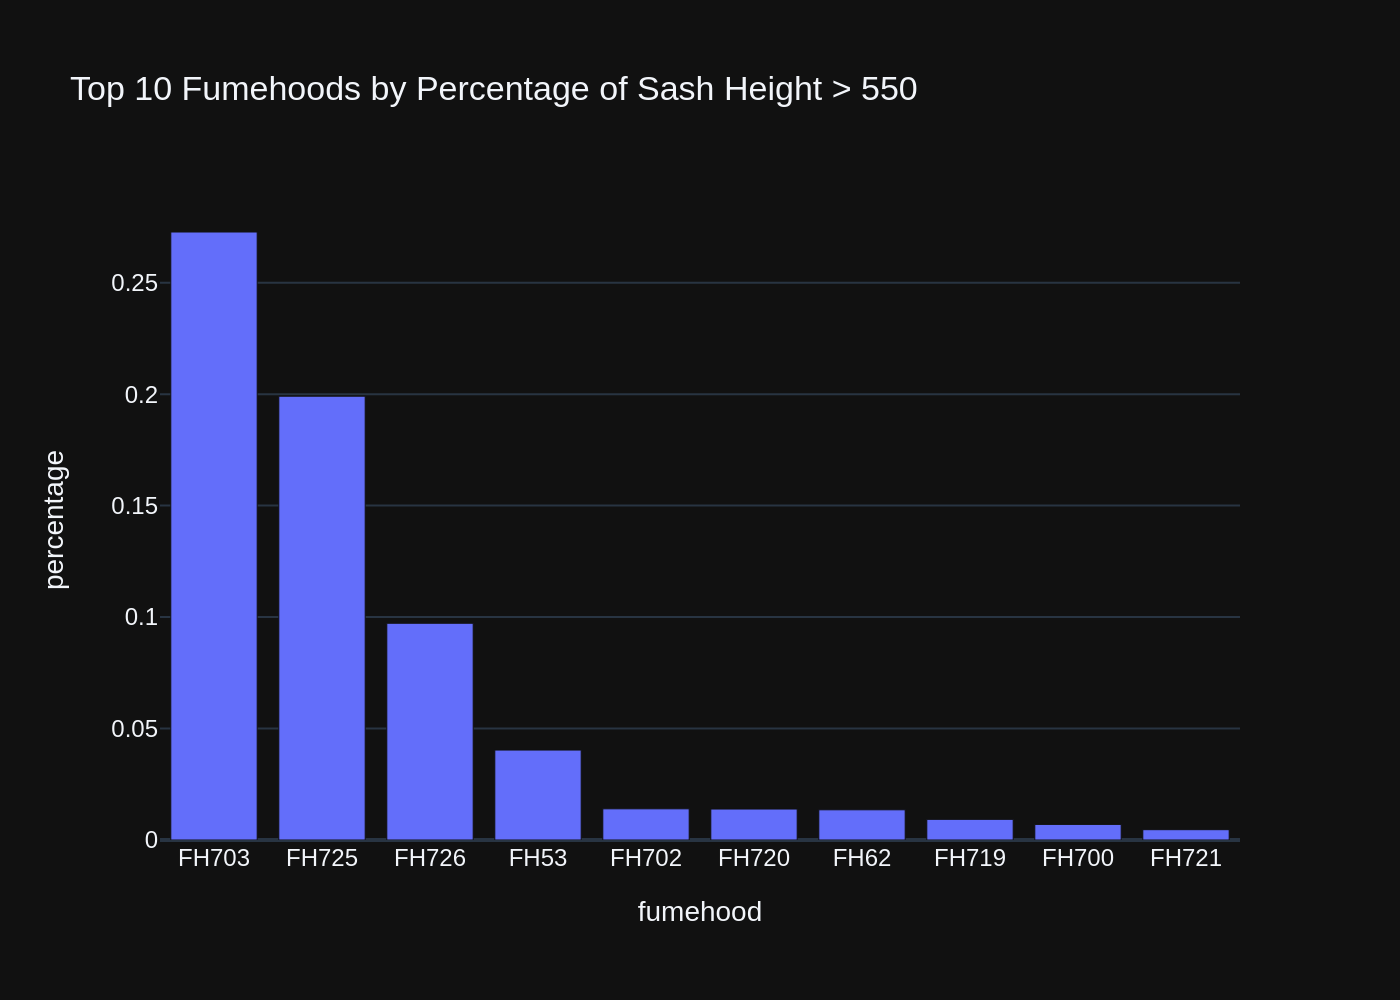

('SELECT\n    fumehood,\n    COUNT(CASE WHEN data > 550 THEN 1 END) * 1.0 / COUNT(*) AS percentage\nFROM\n    energy\nGROUP BY\n    fumehood\nORDER BY\n    percentage DESC\nLIMIT 10;',
   fumehood  percentage
 0    FH703    0.272727
 1    FH725    0.199074
 2    FH726    0.097222
 3     FH53    0.040346
 4    FH702    0.013986
 5    FH720    0.013889
 6     FH62    0.013544
 7    FH719    0.009259
 8    FH700    0.006993
 9    FH721    0.004630,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'fumehood=%{x}<br>percentage=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['FH703', 'FH725', 'FH726', 'FH53', 'FH702', 'FH720', 'FH62', 'FH719',
           

In [ ]:
vn.ask(question=question, allow_llm_to_see_data=True)

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE energy (\n\t_id TEXT, \n\t"TLInstance" VARCHAR, \n\tdata FLOAT, \n\tsort VARCHAR, \n\ttime VARCHAR, \n\t"Room" VARCHAR, \n\tfumehood VARCHAR, \n\tpercent BOOLEAN, \n\t"DEPT" VARCHAR, \n\tovernight BOOLEAN, \n\tdate VARCHAR, \n\tvalid BOOLEAN, \n\t"Top10OSH" INTEGER, \n\t"OSH" FLOAT, \n\t"CDOValue" FLOAT, \n\t"CDOET" INTEGER, \n\tnonusecount INTEGER, \n\tcat VARCHAR\n)\n\n\n===Additional Context \n\nOur business defines TLInstances also known to be fumehoods would have a sequence of time series data point and data column data representing the sash height at that time\n\nThe sqlite engine does not support PERCENTILE_CONT, so every time stick to the classic sql\n\novernight column is a bool representation means if such ti

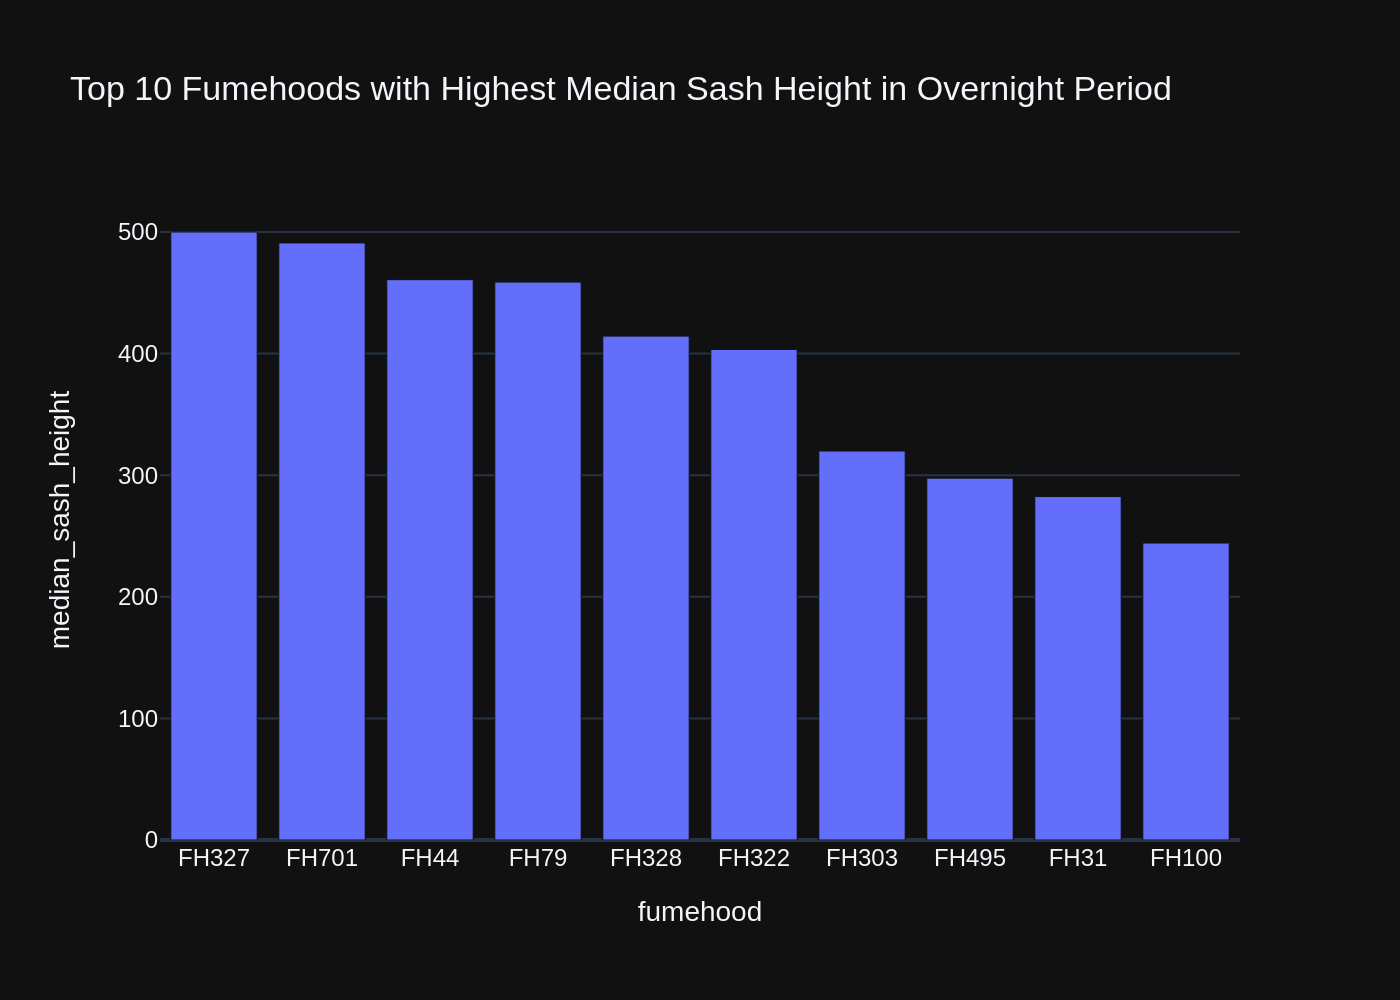

('WITH RankedData AS (\n    SELECT\n        fumehood,\n        data,\n        ROW_NUMBER() OVER (PARTITION BY fumehood ORDER BY data) AS rn,\n        COUNT(*) OVER (PARTITION BY fumehood) AS cnt\n    FROM\n        energy\n    WHERE\n        overnight = 1\n),\nMedians AS (\n    SELECT\n        fumehood,\n        CASE\n            -- If count is odd, take the middle value\n            WHEN cnt % 2 = 1 THEN\n                MAX(CASE WHEN rn = (cnt + 1) / 2 THEN data END)\n                    OVER (PARTITION BY fumehood)\n            -- If count is even, take the average of the two middle values\n            ELSE\n                AVG(CASE WHEN rn IN ((cnt / 2), (cnt / 2) + 1) THEN data END)\n                    OVER (PARTITION BY fumehood)\n        END AS median_sash_height\n    FROM\n        RankedData\n)\nSELECT\n    fumehood,\n    median_sash_height\nFROM\n    Medians\nGROUP BY\n    fumehood, median_sash_height\nORDER BY\n    median_sash_height DESC\nLIMIT 10;',
   fumehood  median_sash

In [ ]:
vn.ask(question='what is the top 10 fumehoods that have highest median sash height in overnight period', allow_llm_to_see_data=True)

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
